In [1]:
from os import path
from src import paths
from src.plotting import plot_mcmc_overview
import os
import re

### Plotting the MCMC chains for each diffusion coefficient

Plots for Diffusion Coeffcient 2:
Chain 1: 0.082 acceptance rate.
Chain 2: 0.098 acceptance rate.
Chain 3: 0.026 acceptance rate.


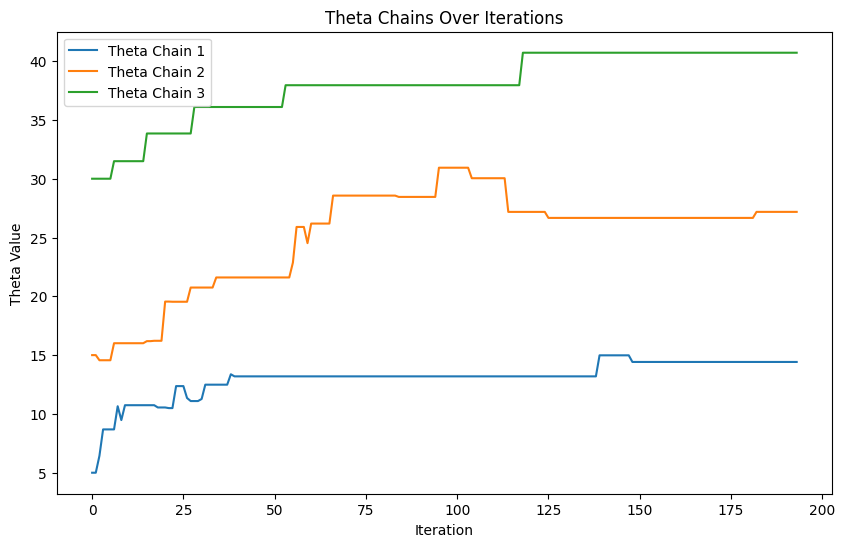

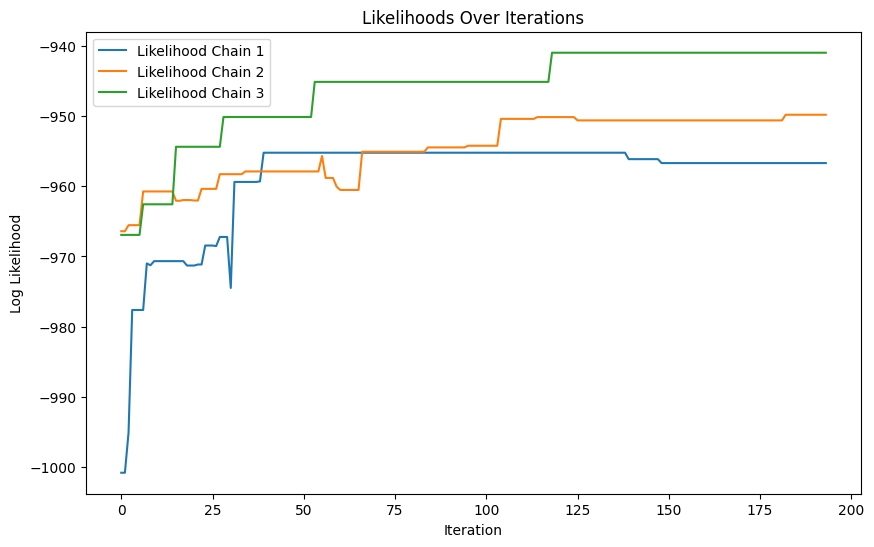

Plots for Diffusion Coeffcient 1:
Chain 1: 0.144 acceptance rate.
Chain 2: 0.031 acceptance rate.
Chain 3: 0.031 acceptance rate.


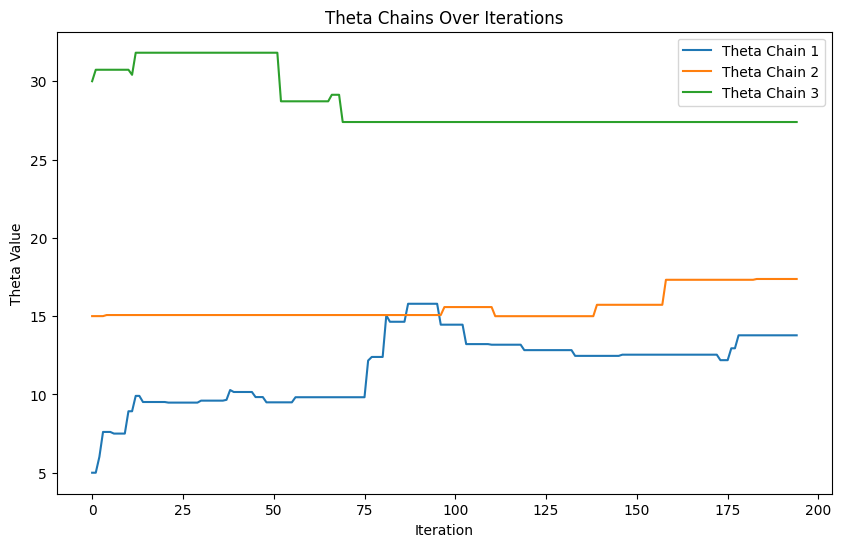

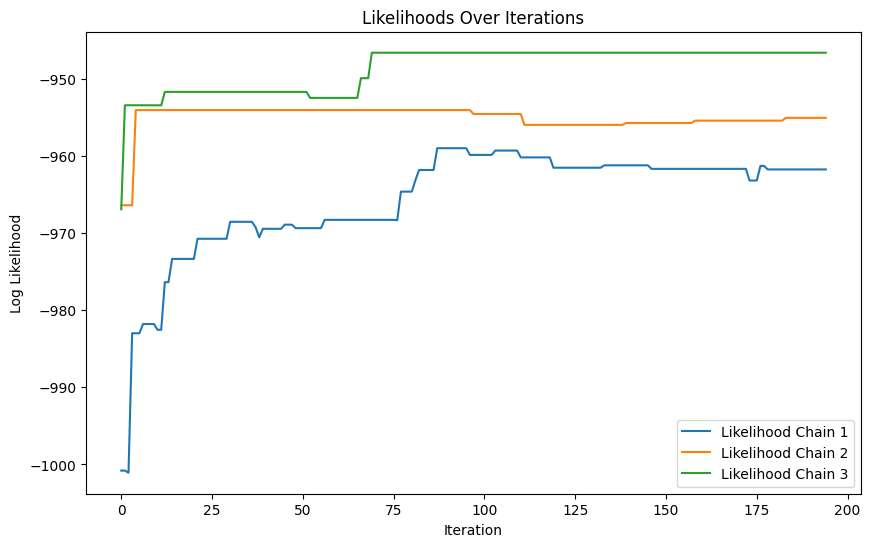

Plots for Diffusion Coeffcient 0.05:
Chain 1: 0.141 acceptance rate.
Chain 2: 0.045 acceptance rate.
Chain 3: 0.025 acceptance rate.


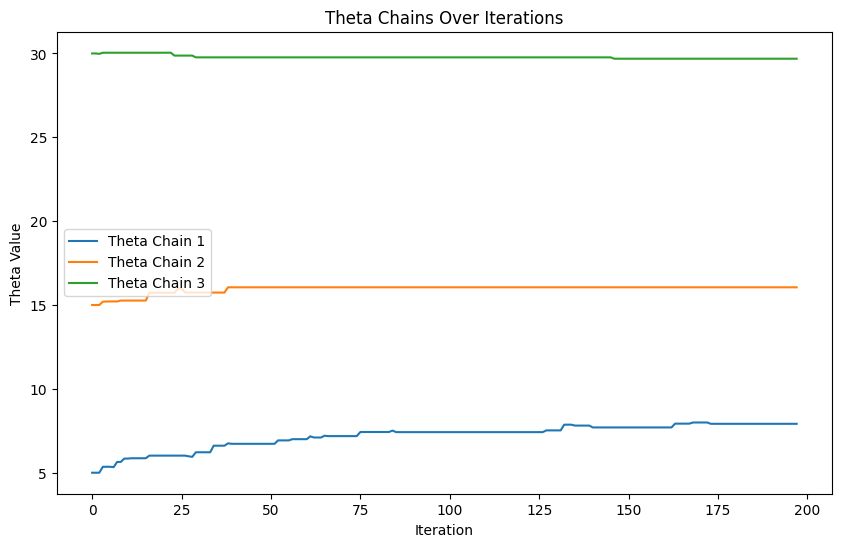

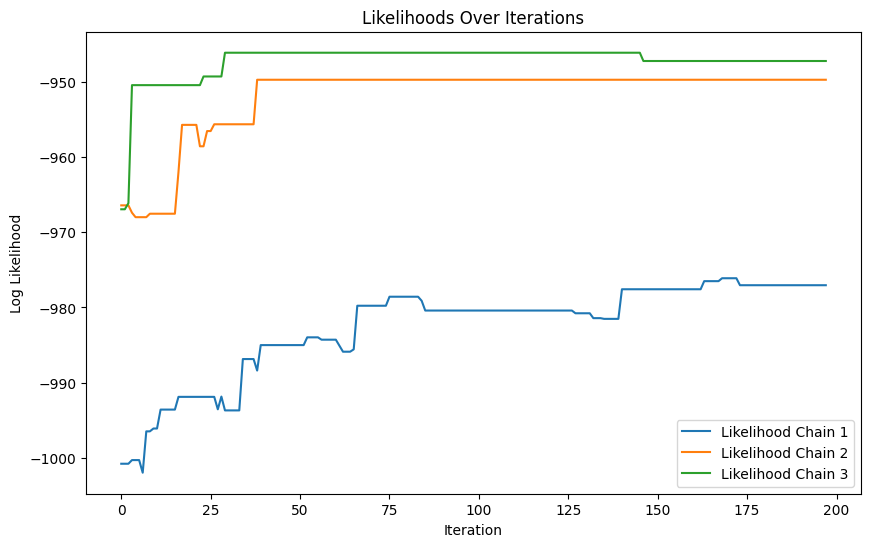

Plots for Diffusion Coeffcient 0.5:
Chain 1: 0.087 acceptance rate.
Chain 2: 0.062 acceptance rate.
Chain 3: 0.021 acceptance rate.


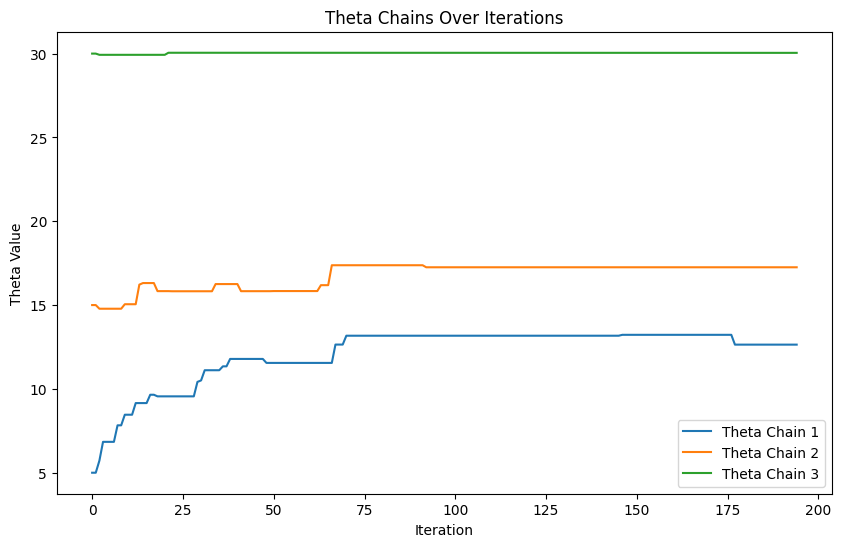

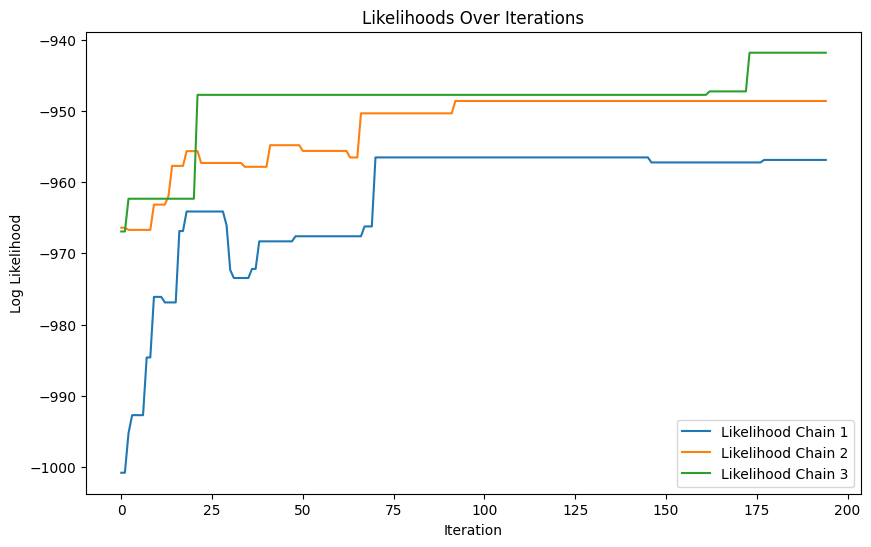

Plots for Diffusion Coeffcient 0.2:
Chain 1: 0.129 acceptance rate.
Chain 2: 0.062 acceptance rate.
Chain 3: 0.031 acceptance rate.


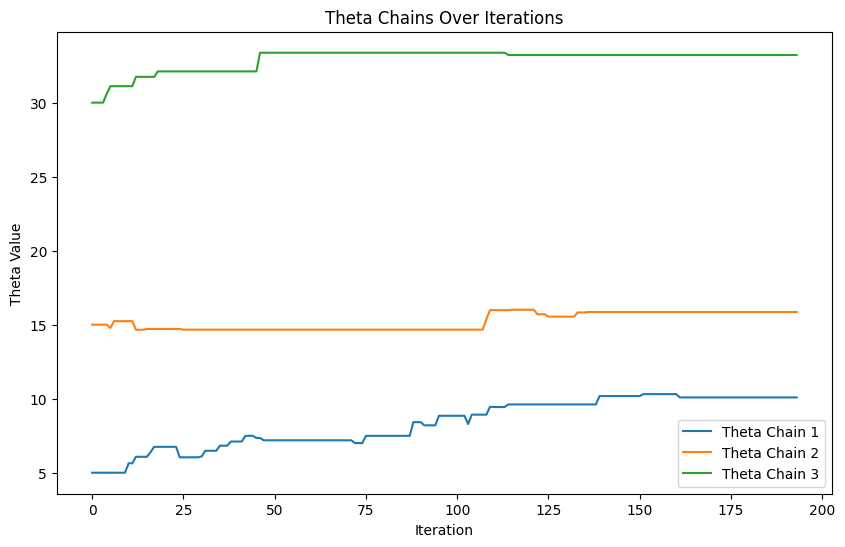

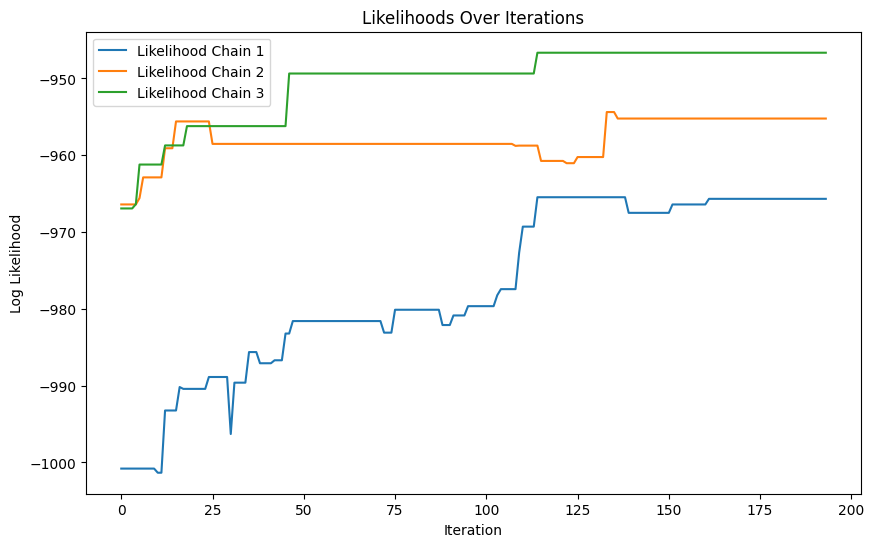

Plots for Diffusion Coeffcient 0.1:
Chain 1: 0.113 acceptance rate.
Chain 2: 0.056 acceptance rate.
Chain 3: 0.026 acceptance rate.


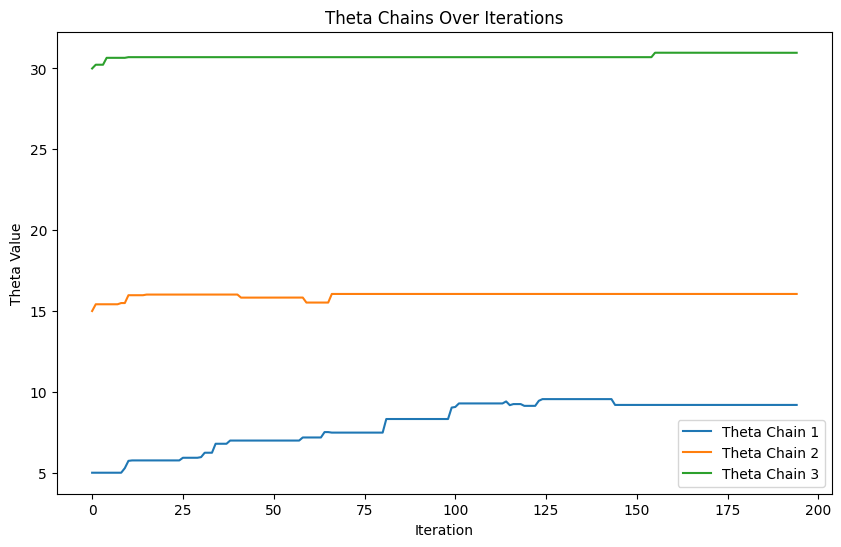

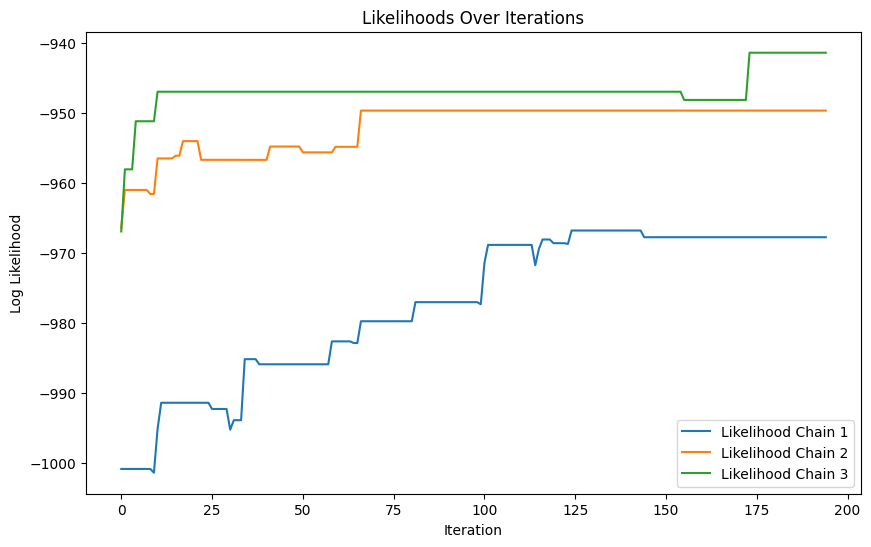

In [2]:
test_dir = os.path.join(paths.OUTPUT_DIR, "diff_coeff_test_20241005")

for file in os.listdir(test_dir):
    file_path = os.path.join(test_dir, file)

    match = re.search(r"diff(\d+(\.\d+)?)", file)

    if match:
        diffusion = match.group(1)
        print(f"Plots for Diffusion Coeffcient {diffusion}:")

    plot_mcmc_overview(file_path)

### Plot Beta time series for each of the 6 diffusion coefficient values

Each of the median values is from the Maximum Likelihood Estimate of a PMCMC run using the given diffusion coefficient (which determines the scale of each new proposal).

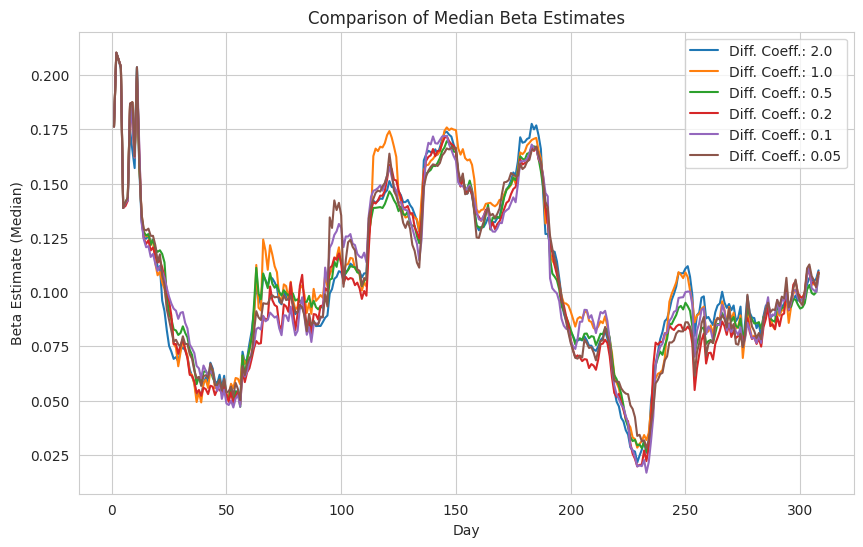

In [23]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Folder containing the CSV files
folder_path = os.path.join(paths.OUTPUT_DIR, "diff_coeff_test_20241005")

medians_dict = {}

# Loop over all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Extract the numeric value from the filename
        match = re.search(r"([\d\.]+)_in_progress", filename)
        if match:
            number = float(match.group(1))

            # Load the CSV file into a DataFrame
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            df = df.drop(columns=["Unnamed: 0"])
            median_beta = df.median(axis=0)
            medians_dict[number] = median_beta

# Plot the medians for each CSV file
plt.figure(figsize=(10, 6))
days = np.arange(1, df.shape[1] + 1)  # Assuming all files have the same number of days

for number, median_beta in medians_dict.items():
    plt.plot(days, median_beta, label=f"Diff. Coeff.: {number}")

plt.xlabel("Day")
plt.ylabel("Beta Estimate (Median)")
plt.title("Comparison of Median Beta Estimates")
plt.legend()

# Show plot
plt.show()